<a href="https://colab.research.google.com/github/fahammed2022/Enhancing-Breast-Cancer-Detection/blob/main/Enhancing_Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load and prepare the data

In [6]:
# Mount Google drive to access the dataset
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Important libraries for this project
import pandas as pd  # To read the dataset from CSV file
from sklearn.preprocessing import StandardScaler  # Using for Data Preprocessing
from sklearn.model_selection import train_test_split  # To split the dataset into training and test sets
import numpy as np  # Accessing data
from sklearn.preprocessing import LabelEncoder

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Read the dataset
dataset_path = "/content/drive/MyDrive/Breastcancer/breast-cancer fahad.csv"
Dataset = pd.read_csv(dataset_path)

# Display first 5 rows of the dataset
print(Dataset.head())

# Handle Missing Values
Clean_dataset = Dataset.dropna(axis=0)

# Encode Target Variable
encoder = LabelEncoder()
Clean_dataset['diagnosis'] = encoder.fit_transform(Clean_dataset['diagnosis'])

# Features and Target Variable
Target = Clean_dataset['diagnosis']  # Target Column
Features = Clean_dataset.drop(['diagnosis'], axis=1)  # Features Column

#Count Target class
class_counts = Target.value_counts()
print(class_counts)

# Split Training data and Test data
Features_Training, Features_Test, Target_Training, Target_Test = train_test_split(
    Features, Target, random_state=0)

# Scale the features
scaler = StandardScaler()
Features_Training = scaler.fit_transform(Features_Training)
Features_Test = scaler.transform(Features_Test)



  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

## Baseline KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

# Create a KNN model
K_Nearest_Neighbors = KNeighborsClassifier(n_neighbors=4).fit(
    Features_Training, Target_Training)

# Predictions on Features_Test
y_pred_knn = K_Nearest_Neighbors.predict(Features_Test)

# Calculate and print accuracy
KNN_accuracy = accuracy_score(Target_Test, y_pred_knn)
print("The KNN model accuracy is:", KNN_accuracy)

# Calculate and print F1 score
KNN_f1score = f1_score(Target_Test, y_pred_knn)
print("The KNN model F1 score is:", KNN_f1score)


The KNN model accuracy is: 0.958041958041958
The KNN model F1 score is: 0.9400000000000001


## Baseline RF Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Create a RF model
RF = RandomForestClassifier(n_estimators=12, criterion='entropy', random_state=41)
RF.fit(Features_Training, Target_Training)

# Predictions on Features_Test
y_pred_rf = RF.predict(Features_Test)

# Calculate and print accuracy
RF_accuracy = accuracy_score(Target_Test, y_pred_rf)
print("The RF model accuracy is:", RF_accuracy)

# Calculate and print F1 score
RF_f1score = f1_score(Target_Test, y_pred_rf)
print("The RF model F1 score is:", RF_f1score)


The RF model accuracy is: 0.958041958041958
The RF model F1 score is: 0.9433962264150944


## Basline DNN Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

# Scale the features
scaler = StandardScaler()
Features_Training = scaler.fit_transform(Features_Training)
Features_Test = scaler.transform(Features_Test)

# Build the Neural Network Architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(Features_Training.shape[1],)))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Train the Model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(Features_Training, Target_Training, epochs=100, batch_size=32,
                    validation_data=(Features_Test, Target_Test))

# Predictions
y_pred = model.predict(Features_Test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary labels

# Calculate Accuracy
DNN_accuracy = accuracy_score(Target_Test, y_pred)

# Calculate F1 score
DNN_f1score = f1_score(Target_Test, y_pred)

print(f"The Neural Network model accuracy is: {DNN_accuracy}")
print(f"The Neural Network model F1 score is: {DNN_f1score}")


Epoch 1/100
14/14 [==============================] - 1s 18ms/step - loss: 0.5801 - accuracy: 0.6714 - val_loss: 0.3615 - val_accuracy: 0.8811
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3494 - accuracy: 0.9061 - val_loss: 0.2487 - val_accuracy: 0.9371
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2497 - accuracy: 0.9202 - val_loss: 0.1973 - val_accuracy: 0.9301
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2086 - accuracy: 0.9319 - val_loss: 0.1663 - val_accuracy: 0.9371
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.1749 - accuracy: 0.9437 - val_loss: 0.1469 - val_accuracy: 0.9301
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.1550 - accuracy: 0.9460 - val_loss: 0.1349 - val_accuracy: 0.9231
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.1471 - accuracy: 0.9577 - val_loss: 0.1246 - val_accuracy: 0.9231
Epoch 8/100


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


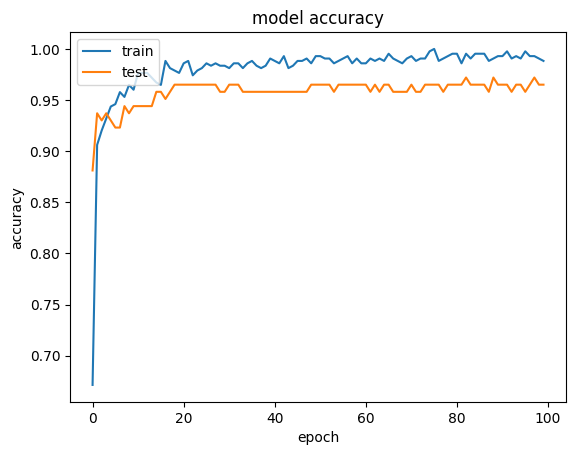

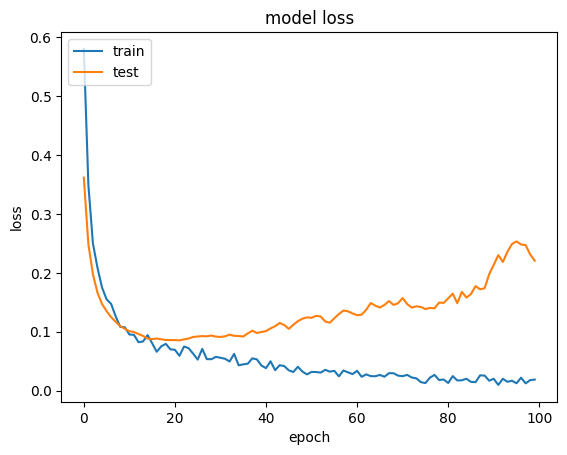

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Baseline Result Table

In [ ]:
from tabulate import tabulate

table = [
    ["KNN", KNN_accuracy, KNN_f1score],
    ["RF", RF_accuracy, RF_f1score],
    ["DNN", DNN_accuracy, DNN_f1score]
]

headers = ["Model Name", "Accuracy", "F1 Score"]

print(tabulate(table, headers, tablefmt="grid"))


+--------------+------------+------------+
| Model Name   |   Accuracy |   F1 Score |
+==============+============+============+
| KNN          |   0.958042 |   0.94     |
+--------------+------------+------------+
| RF           |   0.958042 |   0.943396 |
+--------------+------------+------------+
| DNN          |   0.965035 |   0.953271 |
+--------------+------------+------------+


# Dimension reduction with PCA

In [9]:
from sklearn.decomposition import PCA

# Principal Component Analysis (PCA)
pca = PCA(n_components=22)
Features_Training_pca = pca.fit_transform(Features_Training)
Features_Test_pca = pca.transform(Features_Test)

print("Shape of Features after PCA:", Features_Training_pca.shape)

Shape of Features after PCA: (426, 22)


## PCA with KNN Model

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

# Create a KNN model
K_Nearest_Neighbors = KNeighborsClassifier(n_neighbors=4).fit(
    Features_Training_pca, Target_Training)

# Predictions on Features_Test
y_pred_knn = K_Nearest_Neighbors.predict(Features_Test_pca)

# Calculate and print accuracy
KNN_accuracy_PCA = accuracy_score(Target_Test, y_pred_knn)
print("The KNN model accuracy is:", KNN_accuracy_PCA)

# Calculate and print F1 score
KNN_f1score_PCA = f1_score(Target_Test, y_pred_knn)
print("The KNN model F1 score is:", KNN_f1score_PCA)


The KNN model accuracy is: 0.958041958041958
The KNN model F1 score is: 0.9400000000000001


## PCA with RF Model

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Create a RF model
RF = RandomForestClassifier(n_estimators=12, criterion='entropy', random_state=41)
RF.fit(Features_Training_pca, Target_Training)

# Predictions on Features_Test
y_pred_rf = RF.predict(Features_Test_pca)

# Calculate and print accuracy
RF_accuracy_PCA = accuracy_score(Target_Test, y_pred_rf)
print("The RF model accuracy is:", RF_accuracy_PCA)

# Calculate and print F1 score
RF_f1score_PCA = f1_score(Target_Test, y_pred_rf)
print("The RF model F1 score is:", RF_f1score_PCA)


The RF model accuracy is: 0.8951048951048951
The RF model F1 score is: 0.8571428571428571


## PCA with DNN Model

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

print("Shape of Features after PCA:", Features_Training_pca.shape)

# Build the Neural Network Architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(Features_Training_pca.shape[1],)))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Train the Model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(Features_Training_pca, Target_Training, epochs=100, batch_size=32,
                    validation_data=(Features_Test_pca, Target_Test))

# Predictions
y_pred = model.predict(Features_Test_pca)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary labels

# Calculate Accuracy
accuracy_PCA = accuracy_score(Target_Test, y_pred)

# Calculate F1 score
f1score_PCA = f1_score(Target_Test, y_pred)

print(f"The Neural Network model accuracy is: {accuracy}")
print(f"The Neural Network model F1 score is: {f1score}")


Shape of Features after PCA: (426, 22)
Epoch 1/100
14/14 [==============================] - 5s 67ms/step - loss: 0.6043 - accuracy: 0.7160 - val_loss: 0.4459 - val_accuracy: 0.8601
Epoch 2/100
14/14 [==============================] - 0s 19ms/step - loss: 0.4359 - accuracy: 0.8779 - val_loss: 0.3255 - val_accuracy: 0.9021
Epoch 3/100
14/14 [==============================] - 0s 16ms/step - loss: 0.3167 - accuracy: 0.9343 - val_loss: 0.2510 - val_accuracy: 0.9231
Epoch 4/100
14/14 [==============================] - 0s 18ms/step - loss: 0.2577 - accuracy: 0.9390 - val_loss: 0.2061 - val_accuracy: 0.9301
Epoch 5/100
14/14 [==============================] - 0s 17ms/step - loss: 0.2254 - accuracy: 0.9390 - val_loss: 0.1757 - val_accuracy: 0.9441
Epoch 6/100
14/14 [==============================] - 0s 16ms/step - loss: 0.1984 - accuracy: 0.9484 - val_loss: 0.1581 - val_accuracy: 0.9510
Epoch 7/100
14/14 [==============================] - 0s 15ms/step - loss: 0.1647 - accuracy: 0.9577 - val_los

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


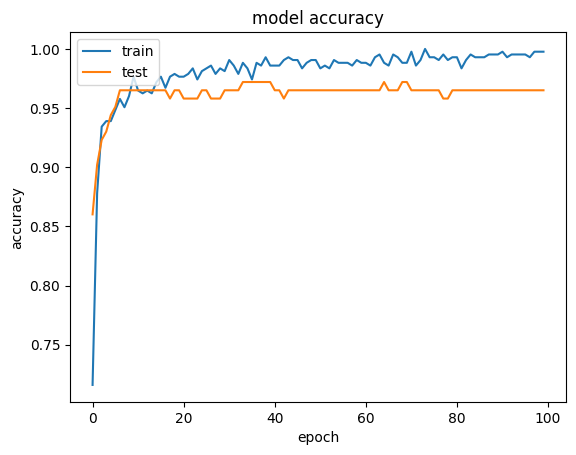

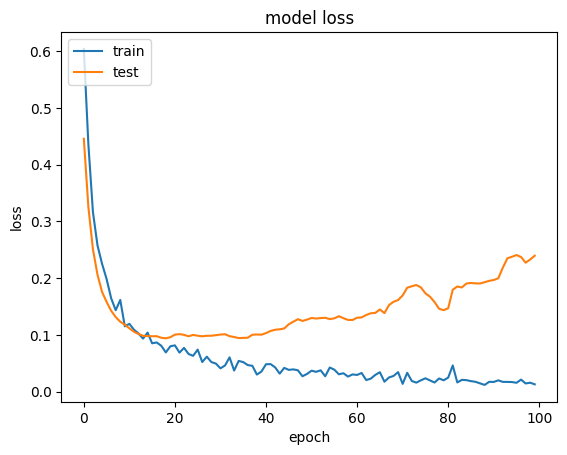

In [16]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Result Table after performing PCA reducing 8 features

In [19]:
from tabulate import tabulate

table = [
    ["KNN", KNN_accuracy_PCA, KNN_f1score_PCA],
    ["RF", RF_accuracy_PCA, RF_f1score_PCA],
    ["DNN", accuracy_PCA, f1score_PCA]
]

headers = ["Model Name", "Accuracy", "F1 Score"]

print(tabulate(table, headers, tablefmt="grid"))

+--------------+------------+------------+
| Model Name   |   Accuracy |   F1 Score |
+==============+============+============+
| KNN          |   0.958042 |   0.94     |
+--------------+------------+------------+
| RF           |   0.895105 |   0.857143 |
+--------------+------------+------------+
| DNN          |   0.965035 |   0.953271 |
+--------------+------------+------------+
